In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [59]:
train_df = pd.read_csv('./data/clean_df.csv')
test_df = pd.read_csv('./data/test_clean.csv')
combine = [train_df, test_df]

In [60]:
test_df.loc[(test_df['Fare'].isnull()),'Fare'] = test_df['Fare'].median()

In [61]:
for dataset in combine:
    dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [62]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,2
1,2,1,1,1,38,1,0,71.2833,0
2,3,1,3,1,26,0,0,7.9250,2
3,4,1,1,1,35,1,0,53.1000,2
4,5,0,3,0,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27,0,0,13.0000,2
885,888,1,1,1,19,0,0,30.0000,2
886,889,0,3,1,21,1,2,23.4500,2
887,890,1,1,0,26,0,0,30.0000,0


In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.025872,0.524184,0.382452,32.096681,1.535433
std,256.998173,0.486260,0.834700,0.477538,13.292042,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,668.000000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Univariate Analysis

## Sex analysis

<Axes: xlabel='Sex', ylabel='count'>

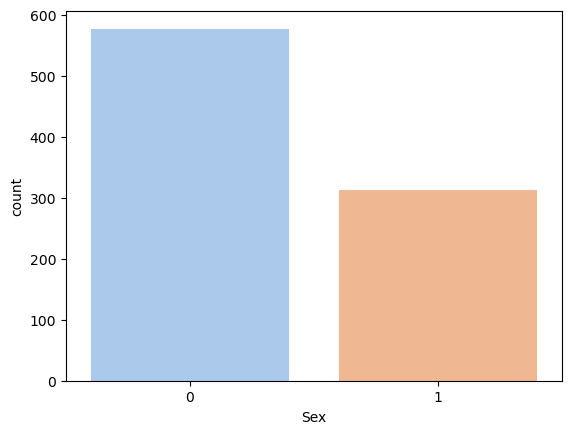

In [64]:
sns.countplot(
    data = train_df,
    x='Sex',
    hue = 'Sex',
    legend = False,
    palette = 'pastel'
)

In [65]:
male_percentage = round(train_df[train_df['Sex'] == 0].shape[0] / train_df.shape[0] * 100)
female_percentage = round(train_df[train_df['Sex'] == 1].shape[0] / train_df.shape[0] * 100)
survive_rate = round(train_df[train_df['Survived'] == 1].shape[0] / train_df.shape[0] * 100)

print(f'Female percentange: {female_percentage}%')
print(f'Male percentange: {male_percentage}%')
print(f'Survive rate: {survive_rate}%')

Female percentange: 35%
Male percentange: 65%
Survive rate: 38%


## Passenger class analysis

In [66]:
def analysis_univarite_numerical(feature, dataframe):
    
    sns.displot(
    data = dataframe,
    x=feature,
    color = 'navajowhite'
    )

    print(dataframe[feature].describe())
    

<Axes: xlabel='Pclass', ylabel='count'>

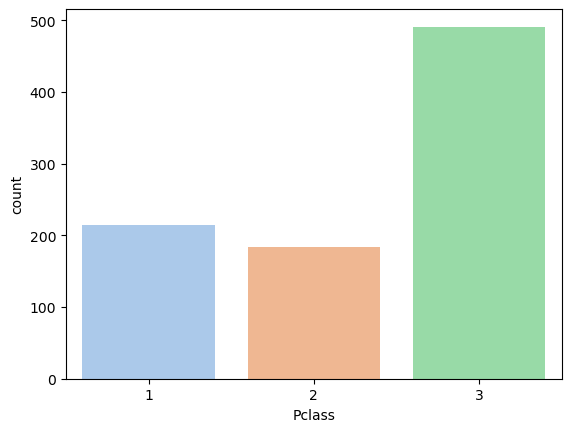

In [67]:
sns.countplot(
    data = train_df,
    x='Pclass',
    hue = 'Pclass',
    legend = False,
    palette = 'pastel'
)

In [68]:
train_df['Pclass'].describe()

count    889.000000
mean       2.311586
std        0.834700
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

## Age analysis

count    889.000000
mean      29.025872
std       13.292042
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


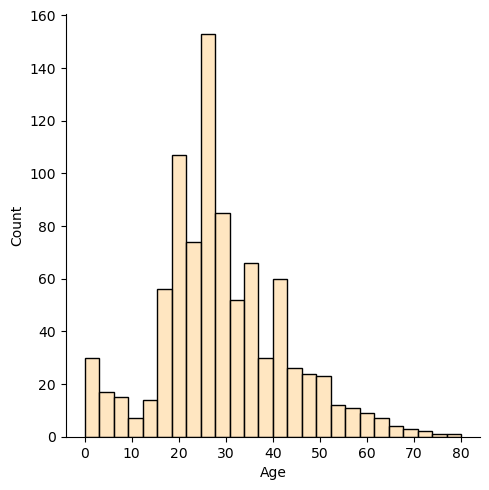

In [69]:
analysis_univarite_numerical('Age', train_df)

## Siblings / Spouses aboard analysis

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


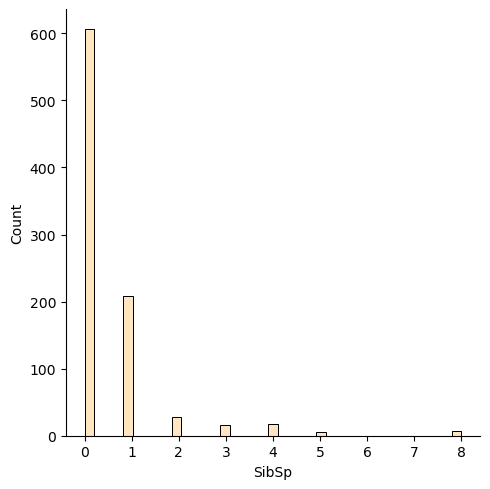

In [70]:
analysis_univarite_numerical('SibSp', train_df)

## Parents / children aboard

count    889.000000
mean       0.382452
std        0.806761
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


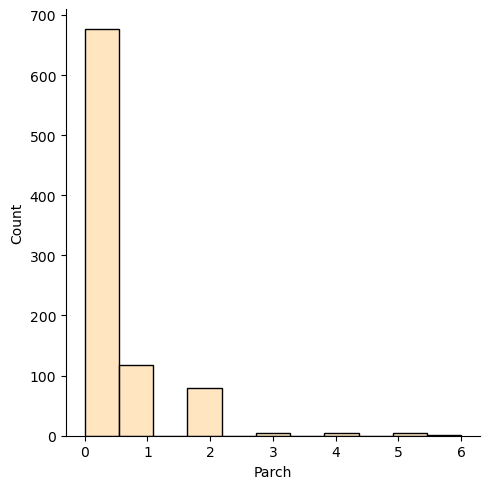

In [71]:
analysis_univarite_numerical('Parch', train_df)

## Fare analysis

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


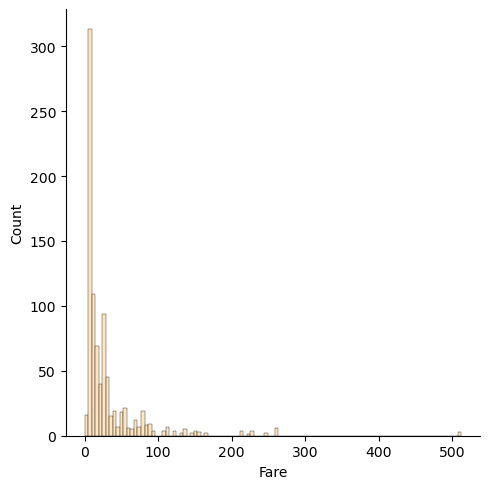

In [72]:
analysis_univarite_numerical('Fare', train_df)

## Embarked analysis

<Axes: xlabel='Embarked', ylabel='count'>

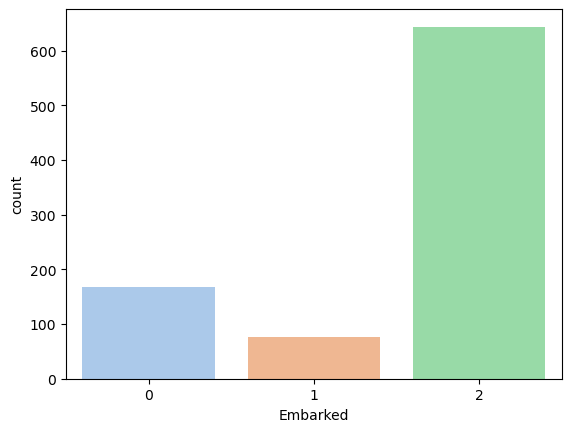

In [73]:
sns.countplot(
    data = train_df,
    x='Embarked',
    hue = 'Embarked',
    legend = False,
    palette = 'pastel'
)

# Bivariate analysis

## Creating some new features

In [74]:
for dataset in combine:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'IsAlone'] = 1

In [75]:
# Converting age into categorical
for dataset in combine:
    dataset['Age'] = pd.cut(
        dataset['Age'], 
        5, 
        labels=[0,1,2,3,4]
        ).astype(int)

## Correlation matrix

<Axes: >

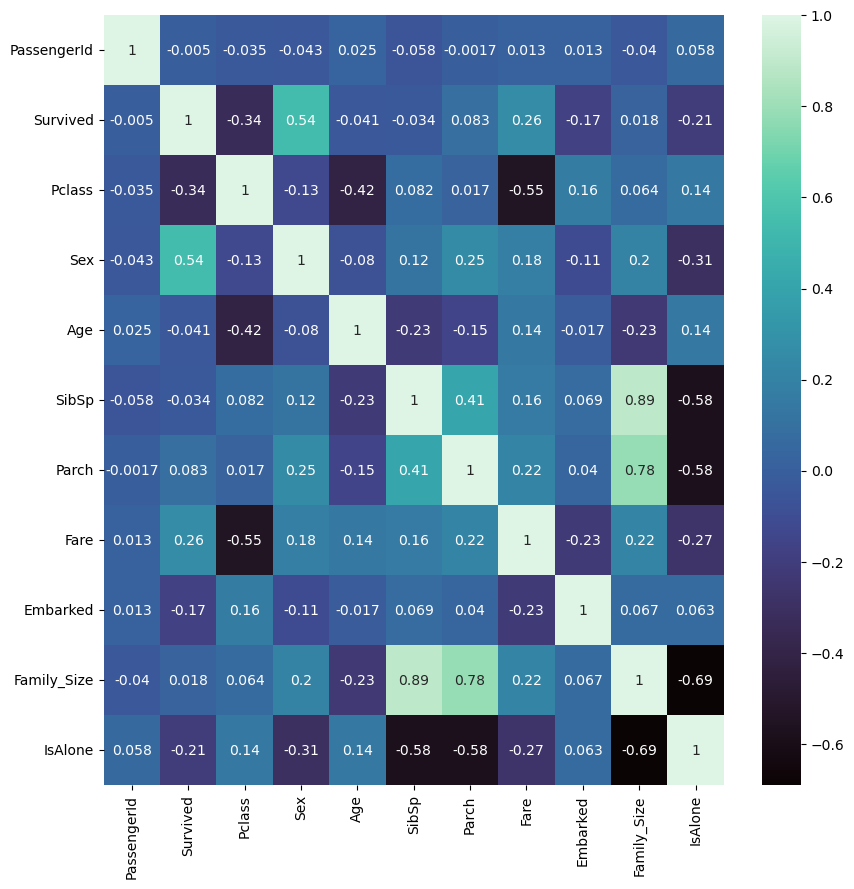

In [76]:
plt.figure(figsize=(10,10))

sns.heatmap(
    train_df.corr(),
    cmap = 'mako',
    annot = True
)

Whit this new features we can see that the family size is not correlated with the data, otherwise Is alone is correlated. So the next is drop Family size, SibSp and Parch

In [77]:
for dataset in combine:
    dataset.drop(['Family_Size', 'SibSp', 'Parch'], axis=1, inplace=True)

### Sex analysis

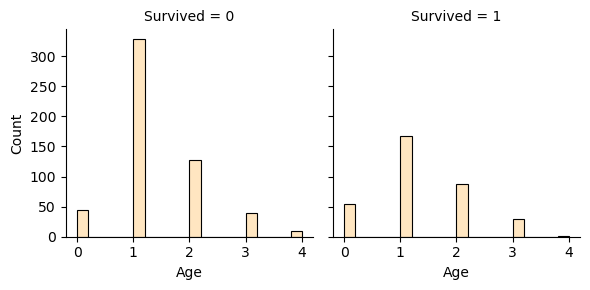

In [78]:


g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.histplot, 'Age', bins=20, color='navajowhite')



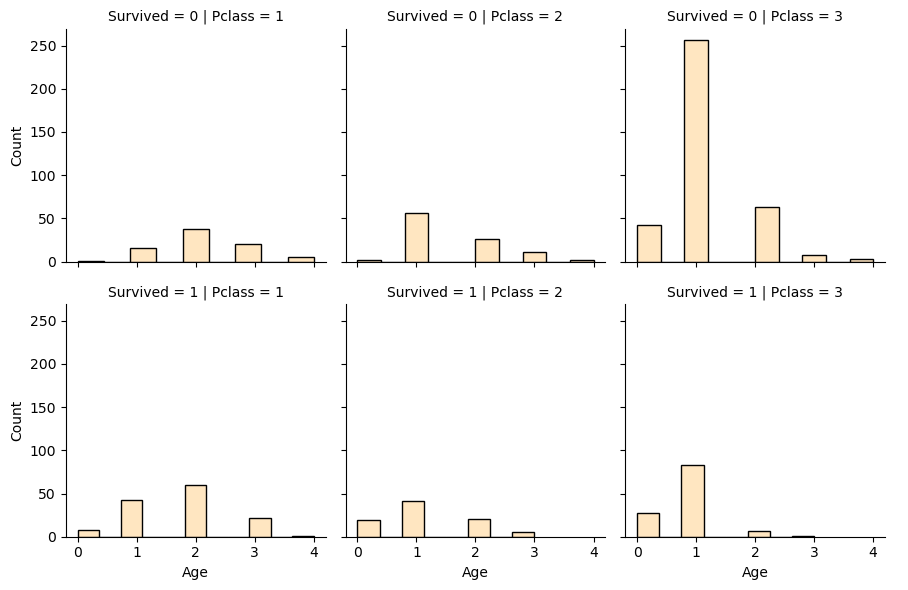

In [79]:
sns.FacetGrid(train_df, col='Pclass', row= 'Survived')\
    .map(sns.histplot, 'Age', color = 'navajowhite')\
    .add_legend()

# Model prediction

In [99]:
X_train = train_df.drop(["PassengerId","Survived"], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 6), (889,), (418, 6))

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [89]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC()
}

In [100]:
scores = {}
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)
    acc = round(classifier.score(X_train, y_train) * 100, 2)
    scores[name] = acc

    

In [101]:
scores

{'LogisticRegression': 78.97,
 'Random Forest': 93.48,
 'Decision Tree': 93.48,
 'SVC': 66.93}

In [95]:
models = pd.DataFrame({
    'Model':list(scores.keys()),
    'Score': list(scores.values()) 
    })

In [96]:
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,93.48
2,Decision Tree,93.48
0,LogisticRegression,78.97
3,SVC,66.93


In [102]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [104]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_predict
    })

In [107]:
submission.to_csv('./submission.csv', index=False)

<Axes: xlabel='Pclass', ylabel='Survived'>

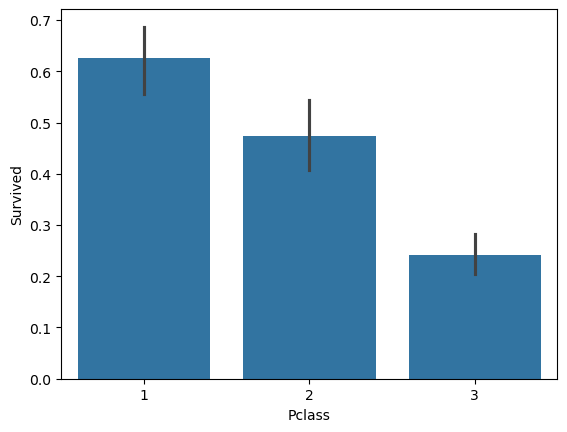

In [108]:
sns.barplot(
    data = train_df,
    x='Pclass',
    y='Survived'
)